In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

* **from __future__ import * **  
    
    将新版本的特性引进当前版本中
    

* **absolute_import**  

    绝对引入主要是针对python2.4及之前的版本的

    这些版本在引入某一个.py文件时，会首先从当前目录下查找是否有该文件。

    如果有，则优先引用当前包内的文件。而如果我们想引用python自带的.py文件时，则需要使用，


* ** division**  

    执行精确除法
    
    eg:>>> 3/4
       0.75

* **print_function**  

    想用python2.x体验python3.x的写法
    
    
* **unicode_literals**  

    2.x里的字符串用'xxx'表示str，Unicode字符串用u'xxx'表示unicode，而在3.x中，所有字符串都被视为unicode

    对于str类型的字符串，调用len()和遍历时，是以字节为单位
    
    对unicode类型的字符串调用len()和遍历时，是以字符为单位

In [2]:
# 导入TensorFlow和tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
#加载Fashion MNIST数据集并返回四个NumPy数组
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**下载数据集一半打断，或者网不好无法下载**

数据集都存放在~/.keras/dataset下

fashion-mnist文件夹下存放4个gz

或直接存放 imdb.npz， mnist.npz

In [4]:
#每个图像都映射到一个标签。由于类别名称不包含在数据集中,因此把他们存储在这里以便在绘制图像时使用:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 探索数据

In [5]:
#训练集中有60,000个图像，每个图像表示为28 x 28像素:
train_images.shape

(60000, 28, 28)

In [6]:
#同样，训练集中有60,000个标签:
len(train_labels)

60000

In [7]:
#每个标签都是0到9之间的整数:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## 数据预处理

In [8]:
#像素值位于[0，255]之间,将它们缩放到0到1的范围

train_images = train_images / 255.0

test_images = test_images / 255.0

**Figure**

整个图像为一个Figure对象.

在Figure对象中可以包含一个或者多个Axes对象。每个Axes(ax)对象都是一个拥有自己坐标系统的绘图区域。

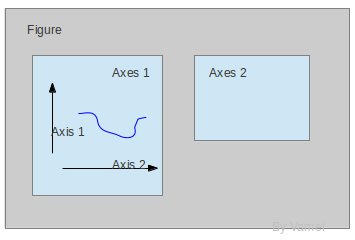


**subplot()**

subplot绘图区才能绘图

subplot(numRows, numCols, plotNum)

plt.subplot(221) //分成2x2，占用第一个，即第一行第一列的子图  

plt.subplot(222)//分成2x2，占用第二个，即第一行第二列的子图  

plt.subplot(212)//分成2x1，占用第二个，即第二行  

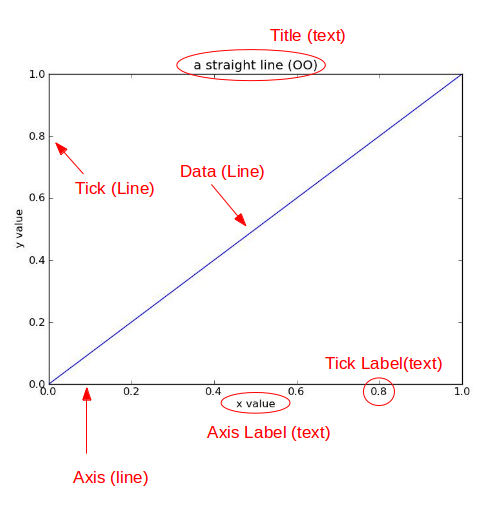

其中：title为图像标题，Axis为坐标轴, Label为坐标轴标注，Tick为刻度线，Tick Label为刻度注释。

**imshow()**

热图（heatmap）是数据分析的常用方法，通过色差、亮度来展示数据的差异、易于理解。

Python在Matplotlib库中，调用imshow()函数实现热图绘制。

imshow(X, cmap=None,.....)

X: 存储图像，可以是浮点型数组、unit8数组以及PIL图像

Colormap：参数cmap用于设置热图的Colormap。

Colormap是MATLAB里面用来设定和获取当前色图的函数


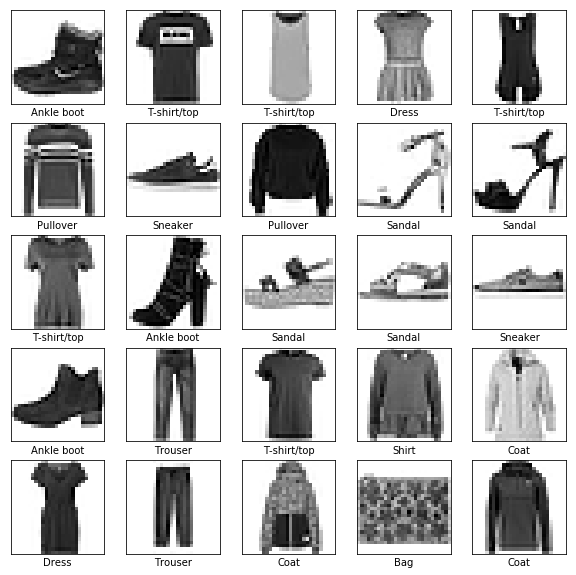

In [9]:
#显示训练集中的前25个图像，并在每个图像下方显示类名。验证数据格式是否正确，我们是否已准备好构建和训练网络。

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)#网格
    plt.imshow(train_images[i], cmap=plt.cm.binary)#灰度   
    plt.xlabel(class_names[train_labels[i]]) #设置坐标轴标签
plt.show()

## 构建模型

构建神经网络需要配置模型的层，然后编译模型。

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(120, activation=tf.nn.relu),
    keras.layers.Dense(84, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

**Flatten**

tf.keras.layers.Flatten, 将图像格式从一个二维数组(包含着28x28个像素)转换成为一个包含着28 * 28 = 784个像素的一维数组。

可以将这个网络层视为它将图像中未堆叠的像素排列在一起。

这个网络层没有需要学习的参数;它仅仅对数据进行格式化。

**Dense**

tf.keras.layers.Dense网络层的序列组成。

他们被称作稠密链接层或全连接层。

第一个Dense网络层包含有128个节点(或被称为神经元)。

第二个(也是最后一个)网络层是一个包含10个节点的softmax层—它将返回包含10个概率分数的数组，总和为1。

每个节点包含一个分数，表示当前图像属于10个类别之一的概率。


## 编译模型

在模型准备好进行训练之前，它还需要一些配置。这些是在模型的编译(compile)步骤中添加的:

* 损失函数 —这可以衡量模型在培训过程中的准确程度。 我们希望将此函数最小化以"驱使"模型朝正确的方向拟合。

* 优化器 —这就是模型根据它看到的数据及其损失函数进行更新的方式。

* 评价方式 —用于监控训练和测试步骤。以下示例使用准确率(accuracy)，即正确分类的图像的分数。

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 训练模型

训练神经网络模型需要以下步骤:

1. 将训练数据提供给模型 - 在本案例中，他们是train_images和train_labels数组。

2. 模型学习如何将图像与其标签关联

3. 我们使用模型对测试集进行预测, 在本案例中为test_images数组。我们验证预测结果是否匹配test_labels数组中保存的标签。

通过调用model.fit方法来训练模型 — 模型对训练数据进行"拟合"。

In [28]:
import datetime
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(train_images, train_labels, epochs=5,callbacks=[tensorboard_callback])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 34s 564us/sample - loss: 0.2260 - accuracy: 0.9146
Epoch 2/5
60000/60000 [==============================] - 8s 125us/sample - loss: 0.2166 - accuracy: 0.9177
Epoch 3/5
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2145 - accuracy: 0.9186
Epoch 4/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2035 - accuracy: 0.9233
Epoch 5/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.1992 - accuracy: 0.9240


In [ ]:
image_num = 3000

In [38]:
e = model.layers[1]
#e.get_weights
#weights = e.get_weights()[0]
print(e.get_weights()[0].shape) # shape: (vocab_size, embedding_dim)

(784, 120)


## 评估准确率

In [26]:
#在测试模式，返回误差值和评估标准值。

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 181us/sample - loss: 0.3239 - accuracy: 0.8870
Test accuracy: 0.887


事实证明，测试数据集的准确性略低于训练数据集的准确性。训练精度和测试精度之间的差距是过拟合的一个例子。

过拟合是指机器学习模型在新数据上的表现比在训练数据上表现更差。

## 进行预测

通过训练模型，我们可以使用它来预测某些图像。

In [14]:
#为输入样本生成输出预测。
#返回预测的 Numpy 数组。
predictions = model.predict(test_images)

In [15]:
#在此，模型已经预测了测试集中每个图像的标签。我们来看看第一个预测:
predictions[0]

array([9.75245030e-07, 1.52268086e-07, 4.87209277e-08, 1.38988048e-06,
       1.41952739e-07, 1.51381042e-04, 2.26747375e-06, 1.42058800e-03,
       1.15910396e-07, 9.98422980e-01], dtype=float32)

预测是10个数字的数组。这些描述了模型的"信心"，即图像对应于10种不同服装中的每一种。

我们可以看到哪个标签具有最高的置信度值：

In [16]:
np.argmax(predictions[0])

9

因此，模型最有信心的是这个图像是ankle boot，或者 class_names[9]。 

我们可以检查测试标签，看看这是否正确:

In [17]:
test_labels[0]

9

我们可以用图表来查看全部10个类别

In [18]:
def plot_image(i, predictions_array, true_label, img):
    '''
    i:第几个图片
    
    predictions_array:预测结果(概率分布)的数组
    
    true_label:真正的分类
    
    img:要预测的图片
    '''    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    '''
    matplotlib.pyplot.bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    
    left：标量序列。表示条形图左边x坐标。
    
    height：标量或者标量序列。条形图的高度。
    
    width：标量或者数组，可选参数。条形图宽度默认为：0.8。
    
    bottom：标量或者数组，可选参数。条形图y坐标，默认值为None。
    
    color：标量或者数组，可选参数。条形图前景色。    
    '''
    plt.ylim([0, 1])#设置x轴和y轴的显示范围
    
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

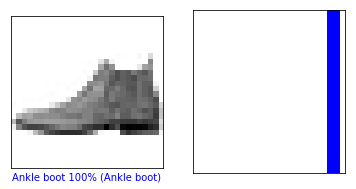

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

绘制几个图像及其预测结果。

正确的预测标签是蓝色的，不正确的预测标签是红色的。

该数字给出了预测标签的百分比(满分100)。

即使非常自信，也可能出错。

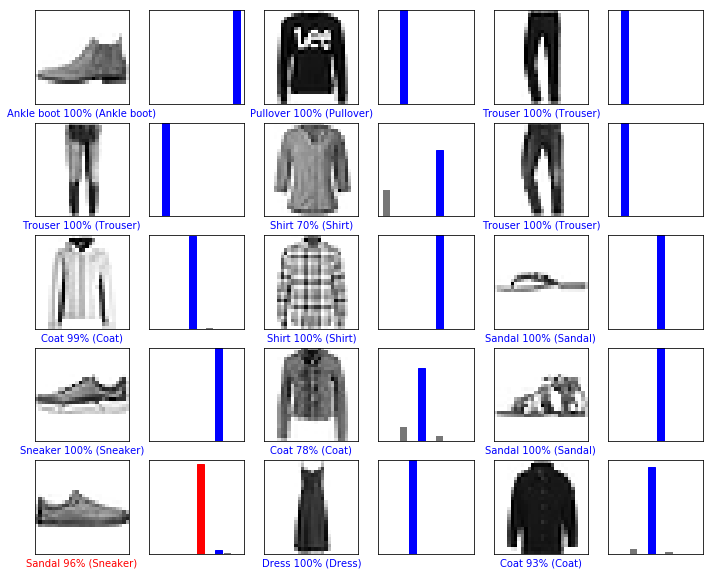

In [20]:
# 绘制前X个测试图像，预测标签和真实标签
# 以蓝色显示正确的预测，红色显示不正确的预测
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

使用训练的模型对单个图像进行预测。

In [21]:
# 从测试数据集中获取图像
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras模型经过优化，可以一次性对批量,或者一个集合的数据进行预测。

因此，即使我们使用单个图像，我们也需要将其添加到列表中:

In [22]:
# 将图像添加到批次中，即使它是唯一的成员。
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [23]:
predictions_single = model.predict(img)

print(predictions_single)

[[9.75242187e-07 1.52267646e-07 4.87207394e-08 1.38987798e-06
  1.41952469e-07 1.51381042e-04 2.26746943e-06 1.42058730e-03
  1.15910176e-07 9.98422980e-01]]


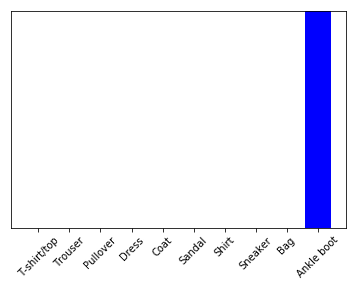

In [24]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [25]:
#model.predict返回一个包含列表的列表，每个图像对应一个列表的数据。获取批次中我们(仅有的)图像的预测:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
